In [18]:
import seaborn as sns
import pandas as pn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
#Importujemo bazu i postavljamo vrednosti zavisnoj promenljivi("x") i nezavisnoj promenljivi("y").
automobili = pn.read_csv('Baza-Automobila.csv') 
x = automobili.drop(['Prosecna Potrosnja (l/km)'],axis=1).values
y = automobili['Prosecna Potrosnja (l/km)'].values
automobili

,Marka I Model,Broj Cilindara,Zapremina Cilindra (cm3),Snaga (ks),Masa (kg),Ubrzanje (0-100 km/h),Godina Proizvodnje,Poreklo,Prosecna Potrosnja (l/km)
0,Fiat Punto,4,1242,60,850,14.3,1999,Evropa,5.7
1,Volkswagen Passat,4,1968,140,1530,9.8,2007,Evropa,5.9
2,Toyota Auris,4,1329,100,1070,13.1,2006,Japan,6.2
3,Audi Q7,6,2967,374,2445,6.2,2016,Evropa,4.3
4,Citroen C5,4,1560,110,1506,11.6,2011,Evropa,5.3
...,...,...,...,...,...,...,...,...,...
95,Chevrolet Corvette,8,5998,404,1983,4.1,2006,USA,12.5
96,Jeep Renegade,4,1956,140,1875,11.2,2018,USA,10.5
97,Ford Mustang,6,2261,317,1789,6.2,2016,USA,9.8
98,Seat Alhambra,4,1998,140,1722,9.3,2015,Evropa,5.8


In [20]:
#funkcija koja nam pokazuje broj automobila sa istim brojem cilindara
automobili['Broj Cilindara'].value_counts()

4     69
6     19
8     10
10     1
3      1
Name: Broj Cilindara, dtype: int64

In [21]:
#funkcija koja nam pokazuje broj automobila proizvedenih iste godine
automobili['Godina Proizvodnje'].value_counts()

2007    19
1999     8
2011     8
2006     8
2005     8
2010     7
2009     6
2012     6
2008     6
2016     5
2018     4
2015     3
2002     2
2001     2
2021     2
2003     2
2020     2
2014     1
1975     1
Name: Godina Proizvodnje, dtype: int64

In [22]:
#funkcija koja nam pokazuje broj automobila po marki i modelu
automobili["Marka I Model"].value_counts()

Fiat Punto              6
Volkswagen Passat       5
Ford Mustang            4
Hummer H2               3
Volkswagen Golf         3
Seat Leon               3
Toyota Auris            3
Renault Clio            3
Dacia Logan             3
Chevrolet Corvette      3
Mazda 3                 2
RAM 1500                2
Jeep Wrangler           2
Mitsubishi Colt         2
Fiat 500                2
Toyota Yaris            2
Honda Accord            2
Fiat Punto Evo          2
Toyota Supra            2
Honda CR-Z              2
Dodge Charger           2
Fiat Grande Punto       2
Zastava Yugo            2
Alfa Romeo 159          2
Hummer H3               2
Jeep Grand Cherokee     2
Jeep Renegade           2
Mitsubishi ASX          2
Opel Corsa              2
Mercedes Benz C350      2
Honda Civic             2
Zastava 128             1
BMW M5                  1
BMW 320                 1
Peugeot 307             1
Seat Ibitza             1
Audi Q7                 1
Fiat Sedici             1
Suzuki SX4  

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Ukupan Broj Automobila Po Godini Proizvodnje'}, xlabel='Marka I Model', ylabel='count'>

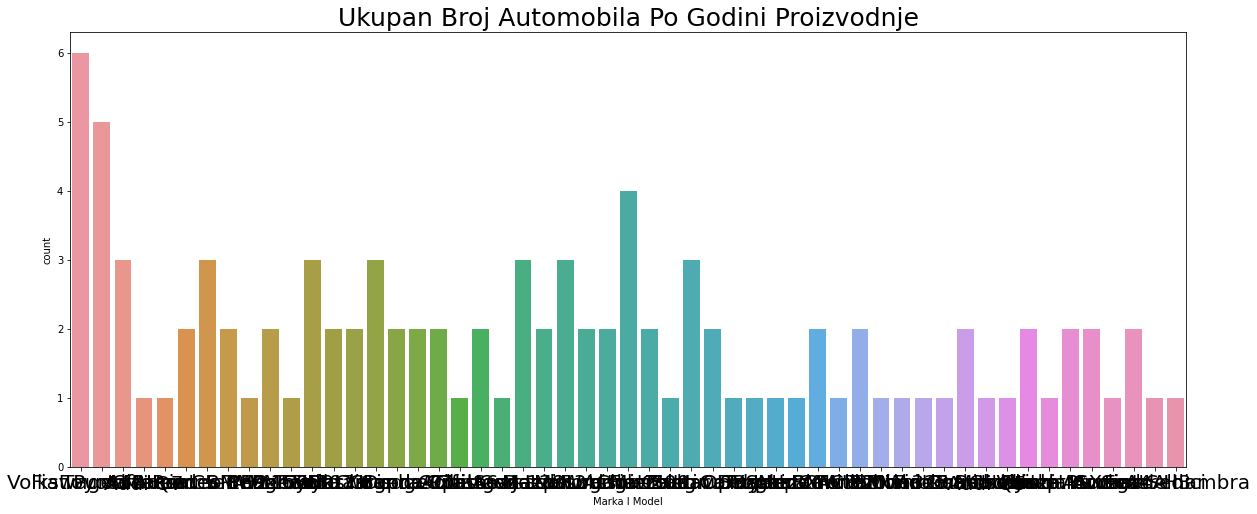

In [23]:
plt.figure(figsize=(20,8))
plt.title("Ukupan Broj Automobila Po Godini Proizvodnje",fontsize=25)
plt.xticks(fontsize=20)

sns.countplot(automobili["Marka I Model"])

In [34]:
#enkodiranje 1 i 7 kolone
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[1,7])],remainder="passthrough")
x_s=np.array(ct.fit_transform(x))
x_s[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 'Fiat Punto', 1242, 60,
       850, 14.3, 1999], dtype=object)

In [35]:
#pretvaranje stringa u int
from sklearn.preprocessing import LabelEncoder
le_ime=LabelEncoder()
x_s[:,8]=le_ime.fit_transform(x_s[:,8].astype(str))

In [36]:
newdata=pn.DataFrame(x_s,columns=["3","4","5","6","8","Evropa","Japan","USA","Marka I Model","Zapremina Cilindra (cm3)","Snaga (ks)","Masa (kg)","Ubrzanje 0-100 (km/h)","Godina Proizvodnje"])

In [37]:
newdata

,3,4,5,6,8,Evropa,Japan,USA,Marka I Model,Zapremina Cilindra (cm3),Snaga (ks),Masa (kg),Ubrzanje 0-100 (km/h),Godina Proizvodnje
0,0,1,0,0,0,1,0,0,16,1242,60,850,14.3,1999
1,0,1,0,0,0,1,0,0,50,1968,140,1530,9.8,2007
2,0,1,0,0,0,0,1,0,45,1329,100,1070,13.1,2006
3,0,0,1,0,0,1,0,0,5,2967,374,2445,6.2,2016
4,0,1,0,0,0,1,0,0,11,1560,110,1506,11.6,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,0,0,0,1,9,5998,404,1983,4.1,2006
96,0,1,0,0,0,0,0,1,27,1956,140,1875,11.2,2018
97,0,0,1,0,0,0,0,1,20,2261,317,1789,6.2,2016
98,0,1,0,0,0,1,0,0,40,1998,140,1722,9.3,2015


In [38]:
#Pomocne promenljive koje nam pomazu oko predvidjanja
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg_fs=LinearRegression()
Linreg.fit(x_train,y_train)

LinearRegression()

In [30]:
#Predvidjeno resenje
P_linreg=Linreg.predict(x_test)

In [39]:
#Racunamo tacnost procene
from sklearn.metrics import r2_score
lin_score=r2_score(y_test,P_linreg)*100
print(lin_score)


74.23225901103395


In [40]:
Score=pn.DataFrame({"MODEL":["Linear Regression"],"TACNOST":[lin_score]})
Score

,MODEL,TACNOST
0,Linear Regression,74.232259


In [33]:
sample=pn.DataFrame({"TACNA POTROSNJA (l/km)":y_test,"PREDVIDJENA POTROSNJA (l/km)":np.round(P_linreg,2)})
sample

,TACNA POTROSNJA (l/km),PREDVIDJENA POTROSNJA (l/km)
0,7.1,6.33
1,5.9,6.72
2,6.2,5.98
3,7.5,7.23
4,4.7,6.18
5,8.7,6.24
6,9.8,11.11
7,10.5,9.65
8,20.2,16.78
9,6.1,5.38
